<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/7_1_ArtificialNeuralNetwork_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data() #load_data() 훈련 데이터와 테스트 데이터를 나누어 반환.

In [ ]:
print(train_input.shape, train_target.shape) #6만개의 28 * 28 이미지, #6만개의 원소 1차원 배열.

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


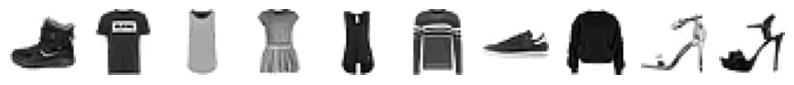

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])
#0:티셔츠 1:바지 2:스웨터 3:드레스 4:코트 5:샌달 6:셔츠 7:스니커즈 8:가방 9:앵클부츠


[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
#패션 MNIST의 각 픽셀은 0~255 사이의 정숫값을 가짐. 보통 255로 나누어 0~1 사이의 값으로 정규화함.
#표준화는 아니지만 양수 값으로 이루어진 이미지를 전처리할 때 널리 사용하는 방법.
#SGDClassifiersms 2차원 입력을 다루지 못함. 각 샘플을 1차원 배열로.
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28) #첫번째 차원(샘플개수) 바뀌지 않고, 2번째 3번째 차원이 1차원으로 합쳐짐.

print(train_scaled.shape)


(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42) #max_iter 늘려도 성능 크게 향상 x
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


0.8196000000000001


In [ ]:
#logistic regression equation
#z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
#first label z_tshirts = w1 * (pixel1) + w2 * (pixel2) + w3 * (pixel3) + ... + w784 * (pixel784) + b
#second label z_pants = w1' * (pixel1) + w2' * (pixel2) + w3' * (pixel3) + ... + w784' * (pixel784) + b'



***McCulloch-Pitts Neuron*** \

인공신경망 \

z1~z10을 계산하고 이를 바탕으로 클래스 예측: **출력층 Output layer** \

***Neuron or Unit*** : z 값을 계산하는 단위. \

***Input Layer*** : x1~x784 \

***Dense Layer or Fully Connected Layer*** : 밀집층, input layer와 units 사이. 784 * 10 = 7840개의 연결된 선.







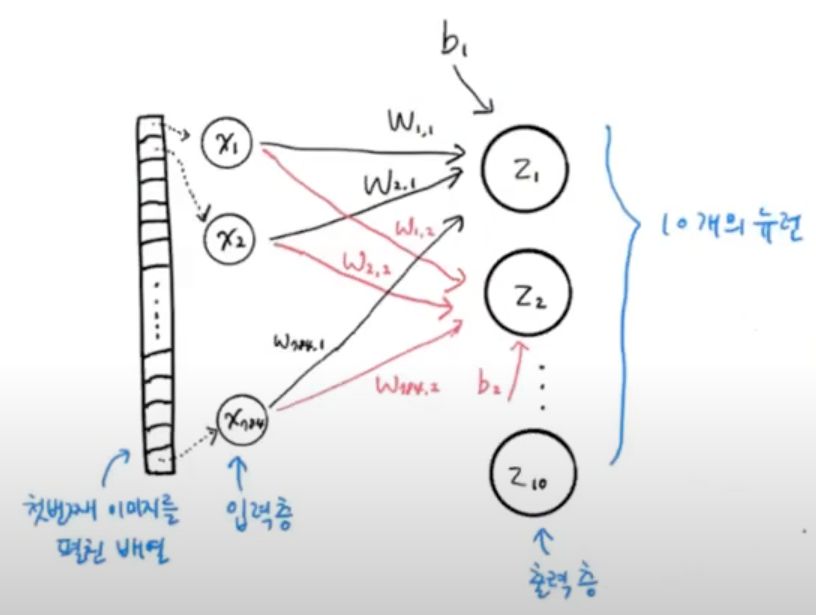

***Tensorflow*** \

구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리. \

***Keras*** \

Tensorflow의 고수준 API. 딥러닝 라이브러리는 GPU를 사용하여 인공 신경망을 훈련. GPU는 백터와 행렬 연산에 매우 최적화되어 있기 때문. >>케라스는 직접 GPU 연산을 수행하지 않기때문에 다른 라이브러리를 backend로 사용. 텐서플로는 케라스의 백엔드 중 하나. CNTK, Theano, 같은 여러 딥러닝 라이브러리를 케라스 백엔드로 사용가능.

In [ ]:
import tensorflow as tf
from tensorflow import keras


로지스틱 회귀에서는 교차 검증, 인공 신경망에서는 교차 검증 x. 검증 세트를 별도로. why? \

1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적.
2. 교차 검증을 수행하기에는 훈련 시간 너무 오래 걸림.

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


***Activation Function 활성화 함수*** \

소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수.

In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
#뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기
#2진 분류법이라면, activation = 'sigmoid'
#10개의 뉴런이 각각 몇 개의 입력을 받는지 튜플로 지정. 784개의 픽셀값!
model = keras.Sequential(dense)
#10개의 뉴런 만들고 softmax함수에 대입. a1,a2,...,a10


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
#케라스 모델 훈련 전, 설정. compile()메서드에서. 손실 함수의 종류 지정. 훈련 과정에서 계산하고 싶은 측정값을 지정.

#이진 분류: loss = 'binary_crossentropy' 손실값 : 이 알고리즘이 얼마나 안좋은지. 손실값 낮을수록 좋은 알고리즘.
#다중 분류: loss = 'categorical_crossentropy' #4장에서 언급.

#이진 분류일때 뉴런이 하나. 오직 양성 클래스에 대한 확률(a) >> 음성 클래스 확률 1-a
#loss 양성 : -log(a) * 타깃값 양성(1)
#loss 음성 : -log(1-a) * 1 - 타깃값 음성 (1-0)

#다중 분류
#a1,a2,a3,...,a10 (10개의 뉴런 10개의 클래스에 대한 확률) >> -log(a1) * 타깃값, -log(a2) * 타깃값...
#이진 분류와 달리 각 클래스에 대한 확률이 모두 출력되기 때문에
#타깃에 해당하는 확률만 남겨 놓기 위해 나머지 확률에는 모두 0을 곱한다.

#티셔츠 샘플의 타깃값은? [1,0,0,0,0,0,0,0,0,0]
#바지 샘플의 타깃값은? [0,1,0,0,0,0,0,0,0,0]
#[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10] * [1,0,0,0,0,0,0,0,0,0]
#loss : -log(a1) * 타깃값, -log(a2) * 타깃값... >> -log(a1)만 남음 샘플이 티셔츠일때.
#손실을 낮추기 위해서 a1의 값을 1에 가깝게 만들어야함.


***One-hot Encoding*** \

타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는것을 원-핫 인코딩.

In [ ]:
print(train_target[:10]) #0~9를 0과 1로만 표현하는 원-핫 인코딩으로 바꿔야됨.

#sparse_categorical_crossentropy는 원-핫 인코딩으로 바꾸지 않고, 그냥 사용가능하기때문에, 빽빽한 배열 말고
#정숫값 하나만 사용한다는 뜻에 sparse(최소)라는 이름을 붙임.
#타깃값을 one-hot encoding으로 준비했다면 compile()에서 loss='categorical_crossentropy'지정.


[7 3 5 8 6 9 3 3 9 9]


***Metrics Parameter*** \

Keras모델은 기본으로 에포크(4.2에서 확인)마다 손실 값을 출력해줌. 손실과 함께 정확도도 필요하다면. metrics = 'accuracy'

In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6121 - accuracy: 0.7901
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4752 - accuracy: 0.8386
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4505 - accuracy: 0.8469
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4376 - accuracy: 0.8525
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4291 - accuracy: 0.8560


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 3ms/step - loss: 0.4385 - accuracy: 0.8520


[0.43849050998687744, 0.8519999980926514]

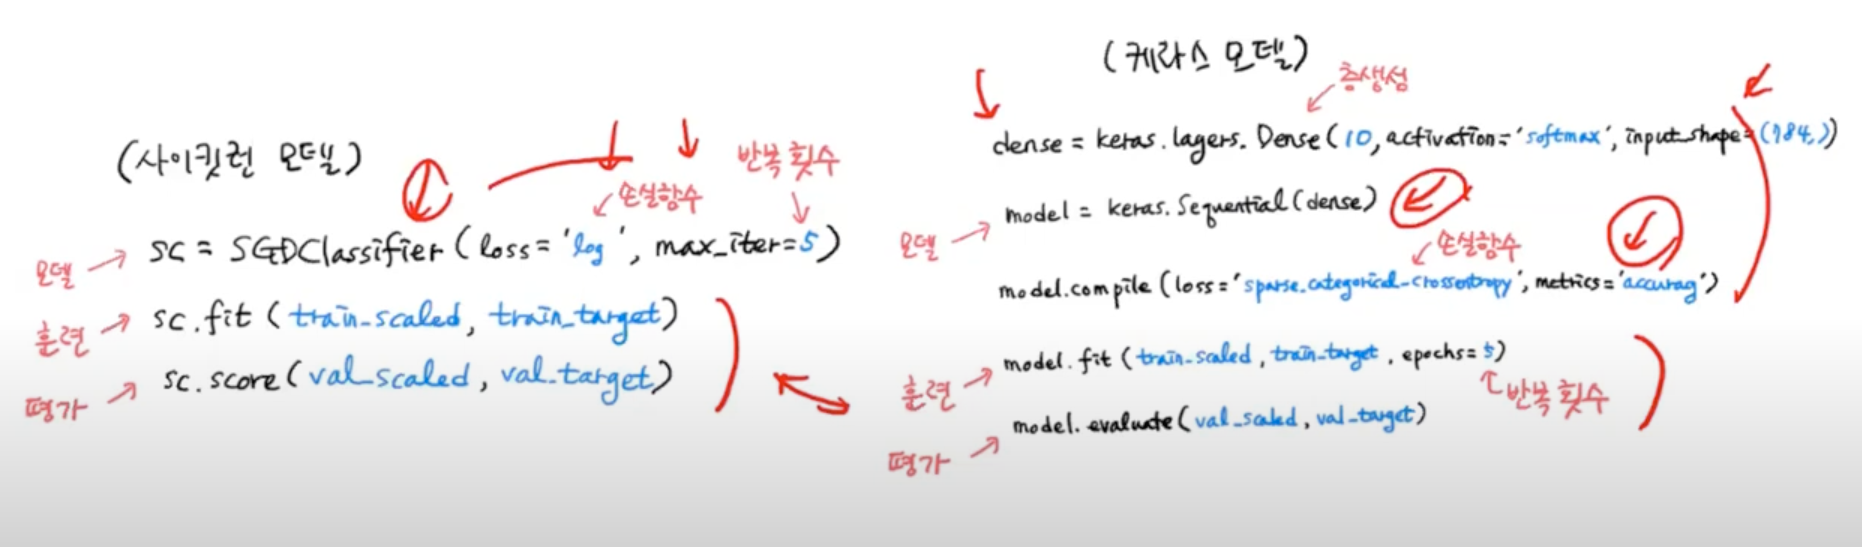